In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import random

In [2]:
# Step 1: Set dataset path
dataset_path = "E:/INTERNSHIP/SC_ML_4/images/"

In [3]:
# Step 2: HOG feature extractor (with visualization option)
def extract_hog(img_path, visualize=False):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))
    if visualize:
        features, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2), visualize=True)
        return features, hog_image
    else:
        features, _ = hog(img, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True)
        return features


In [4]:
# Step 3: Load data and labels
X = []
y = []
image_paths = []  # to later show predictions on actual test images

for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)
    if not os.path.isdir(class_path):
        continue
    for file in os.listdir(class_path):
        file_path = os.path.join(class_path, file)
        try:
            features = extract_hog(file_path)
            X.append(features)
            y.append(class_folder)
            image_paths.append(file_path)
        except Exception as e:
            print(f"Error with file {file_path}: {e}")

In [5]:
# Step 4: Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [6]:
# Step 5: Train/Test split (also split paths to use in test image display)
X_train, X_test, y_train, y_test, path_train, path_test = train_test_split(
    X, y_encoded, image_paths, test_size=0.2, random_state=42)

In [7]:

# Step 6: Train SVM classifier
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [8]:
# Step 7: Evaluate
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("🔍 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


✅ Accuracy: 0.5460829493087558
🔍 Classification Report:
                   precision    recall  f1-score   support

      closedFist       0.54      0.74      0.62        39
    fingerCircle       0.71      0.64      0.67        55
   fingerSymbols       0.55      0.69      0.61       103
 multiFingerBend       0.29      0.15      0.20        13
        openPalm       0.42      0.22      0.29        37
    semiOpenFist       0.41      0.47      0.44        59
    semiOpenPalm       0.61      0.49      0.55        77
singleFingerBend       0.55      0.51      0.53        51

        accuracy                           0.55       434
       macro avg       0.51      0.49      0.49       434
    weighted avg       0.54      0.55      0.54       434



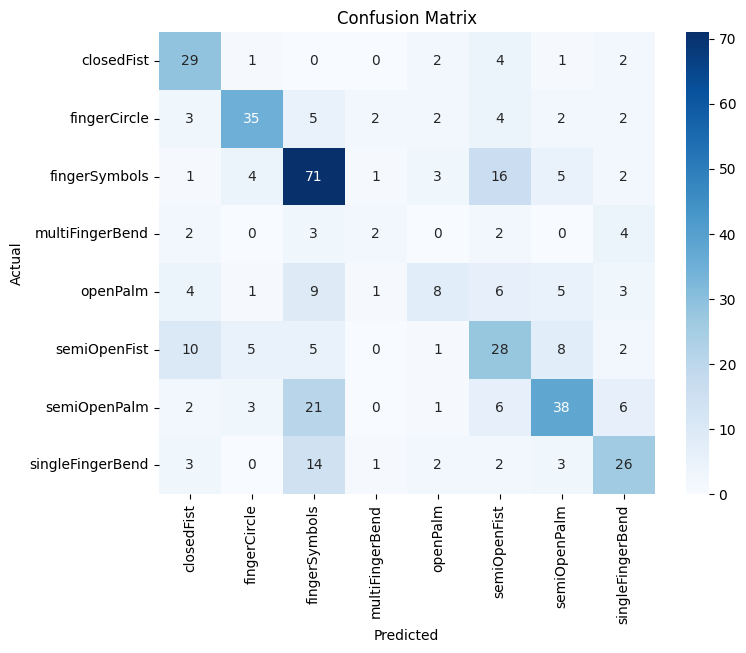

In [9]:
# Step 8: Plot Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


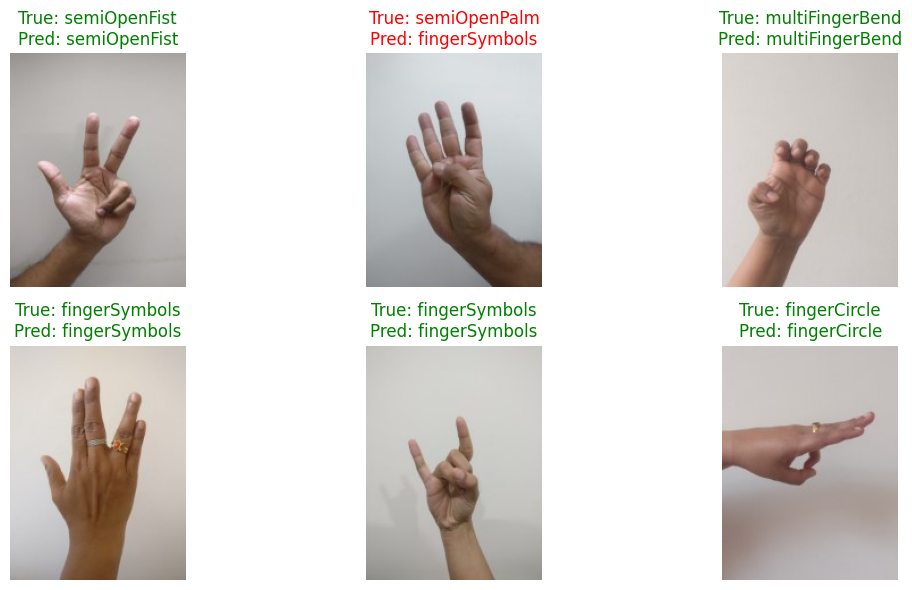

In [10]:
# Step 9: Show sample test images with prediction
def show_predictions():
    indices = random.sample(range(len(X_test)), 6)
    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(indices):
        img = cv2.imread(path_test[idx])
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        true_label = le.inverse_transform([y_test[idx]])[0]
        pred_label = le.inverse_transform([y_pred[idx]])[0]
        plt.subplot(2, 3, i+1)
        plt.imshow(img_rgb)
        plt.axis('off')
        color = 'green' if true_label == pred_label else 'red'
        plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.tight_layout()
    plt.show()

show_predictions()

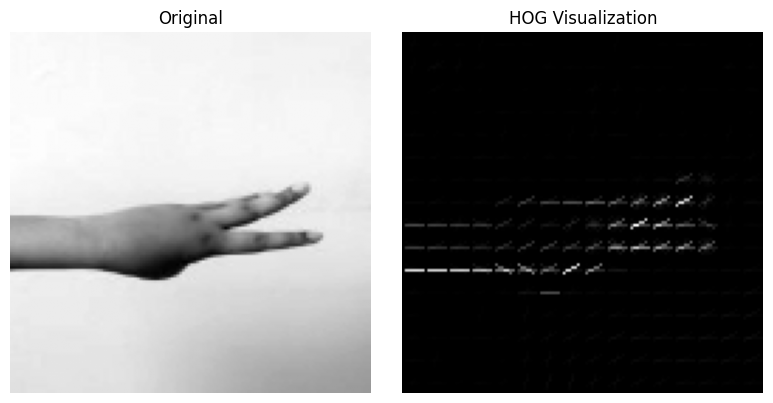

In [11]:
# Step 10 (Optional): Show HOG feature image of a random gesture
def show_hog_example():
    sample_path = random.choice(image_paths)
    img = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))
    _, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), visualize=True)
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original")
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.title("HOG Visualization")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

show_hog_example()